# House Pricing

## Import Libraries and download dataset

In [1]:
# Preprocessing
import pandas as pd
import numpy as np
import pandas_profiling as pp
import missingno as msno #library for work with NaN values
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import f_classif, mutual_info_classif

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 90
%matplotlib inline

In [3]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [4]:
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, StackingRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

## Import Functions

In [6]:
def get_num_info(col, title=None):
    '''Function is called to plot feture distribution'''

    title = title if title is not None else f"Distribution for '{col}"
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5),)
    
    sns.distplot(col.values, bins=20, ax=ax1)
    
    fig = sm.qqplot(col, fit=True, line='45', ax=ax2)
    fig.suptitle(title, fontsize=20)
    
    ax3.boxplot(col.values,vert = False)

    ax1.set_title('QQ-plot')
    ax2.set_title('Distribution')
    ax3.set_title('Boxplot')

    plt.show()

In [7]:
def detect_outliers(data):
    '''Function is called to detect outliers'''
    q1, q3 = np.percentile(sorted(data), [25, 75])

    IQR = q3 - q1

    l_b = q1 - (1.5 * IQR) # lower bound
    u_b = q3 + (1.5 * IQR) # upper bound
    outl_count = len(data[data < l_b]) + len(data[data > u_b])

    print(
        f'Lower Bound: {round(l_b,3)}, Upper Bound {round(u_b,3)}, Outliers Count: {outl_count}')

In [8]:
def roc_curve_plot(y_test, y_probs):
       
    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label='Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [9]:
def confusion_matrix_plot(y_test, y_pred, xlabels = ['True(P)', 'False(P)'], ylabels = ['True(A)', 'False(A)'], title='', cmap = None):
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot=True, annot_kws={"size": 20}, fmt='', cbar = False, xticklabels = xlabels, yticklabels= ylabels, cmap = cmap)
    plt.title('Confusion matrix' + title)
    plt.show()

In [10]:
def get_metrics_classification(y_test, y_pred):
    print('Accuracy = %0.4f' % accuracy_score(y_test,y_pred) 
          + '\nPrecision = %0.4f' % precision_score(y_test,y_pred)
          + '\nReacall = %0.4f' % recall_score(y_test,y_pred)
          + '\nF1_score = %0.4f' % f1_score(y_test,y_pred))

In [11]:
def get_metrics_regression(y_test, y_pred):
    print('Accuracy = %0.4f' % mean_squared_error(y_test,y_pred) 
          + '\nPrecision = %0.4f' % mean_absolute_error(y_test,y_pred)
          + '\nReacall = %0.4f' % mean_absolute_percentage_error(y_test,y_pred)
          + '\nF1_score = %0.4f' % r2_score(y_test,y_pred))

## Downloading

In [12]:
# Download dataset
df_train = pd.read_csv('/home/mark/Documents/GitHub/Datasets/HousePrices/train.csv')
df_test = pd.read_csv('/home/mark/Documents/GitHub/Datasets/HousePrices/test.csv')
df_ss = pd.read_csv('/home/mark/Documents/GitHub/Datasets/HousePrices/sample_submission.csv')

In [13]:
# Merge train and test
df = pd.concat([df_train, df_test], axis=0)

In [14]:
df['train'] = df['SalePrice'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
998,999,30,RM,60.0,9786,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2006,WD,Normal,91000.0,1
613,614,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2007,New,Partial,147000.0,1
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,302000.0,1
1065,2526,20,RL,45.0,8982,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2007,WD,Normal,NaN,0
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,New,Partial,279500.0,1
1395,1396,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,281213.0,1
411,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,...,NaN,NaN,NaN,0,1,2006,WD,Normal,145000.0,1
568,569,50,RL,79.0,12327,Pave,NaN,IR1,Low,AllPub,...,NaN,NaN,NaN,0,9,2009,WD,Normal,316600.0,1
1384,1385,50,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,10,2009,WD,Normal,105000.0,1
1323,1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,NaN,0,12,2009,WD,Normal,82500.0,1


## Profiling

In [16]:
df_profile = df.profile_report()

**[Profile Report - Link](./result1.html)**

## Dataset preproration

### Work with NaN

In [17]:
# Посмотрим на признаки в которых есть пропуски
miss_features = df.isnull().sum().sort_values(ascending=False)[:35]
miss_features

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Electrical         1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
BsmtUnfSF          1
SaleType           1
KitchenQual        1
BsmtFinSF2         1
dtype: int64

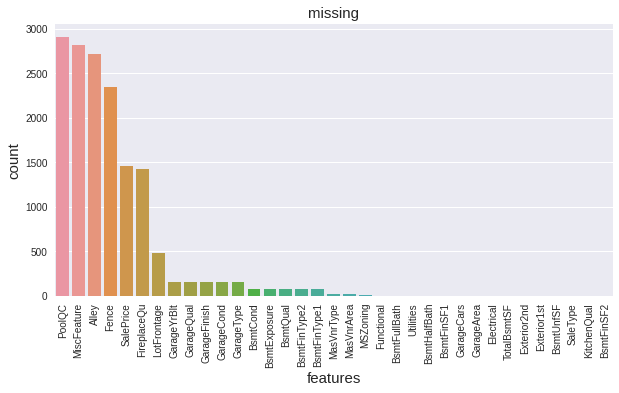

In [18]:
f, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='90')
sns.barplot(x=miss_features.index, y=miss_features)
plt.title('missing', fontsize=15)
plt.xlabel('features', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [19]:
# specific value replacements
# df["PoolQC"] = df["PoolQC"].fillna("None")
# df["MiscFeature"] = df["MiscFeature"].fillna("None")
# df["Alley"] = df["Alley"].fillna("None")
# df["Fence"] = df["Fence"].fillna("None")
# df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df["Functional"] = df["Functional"].fillna("Typ")
df['MSSubClass'] = df['MSSubClass'].fillna("None")

# mean value replacements
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

### Set Type Vars 

In [20]:
# nume
num_cols = set(df._get_numeric_data().columns)

In [21]:
# other vars
other_cols = set(df.columns) - set(num_cols)

In [22]:
# ranking vars
ranking_vars = [
    'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'GarageQual', 'GarageCond','Street',
    'LandSlope', 'Functional', 'GarageFinish', 'MoSold', 'YrSold', 'PavedDrive', 
    'CentralAir', 'LotShape', 'MSSubClass']

# num vars
num_vars = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
    'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
    'OverallQual']

# nominal vars
nominal_vars = [
    'MSZoning', 'LandContour',
    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
    'GarageType', 'SaleType', 'SaleCondition']

### Work with Nums

In [49]:
plt.figure(figsize=(50,20), dpi=150)
sns.heatmap(df[num_cols].corr().abs(),
                  cbar=True,
                  annot=True, vmin=0, vmax=1, fmt='.1g')

KeyError: "['BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtFullBath'] not in index"

<Figure size 7500x3000 with 0 Axes>

In [23]:
# for col in num_cols:
#     get_num_info(df[col], title=col)
#     detect_outliers(df[col])

## FeatureEngeneering

In [24]:
# df['HasMasVnr'] = df.MasVnrArea.apply(lambda x: 1 if x else 0)
# df['Has2ndFlrSF'] = df['2ndFlrSF'].apply(lambda x: 1 if x else 0)
# df['HasGarageArea'] = df['GarageArea'].apply(lambda x: 1 if x else 0)
# df['HasWoodDeckSF'] = df['WoodDeckSF'].apply(lambda x: 1 if x else 0)
# df['HasOpenPorchSF'] = df['OpenPorchSF'].apply(lambda x: 1 if x else 0)
# df['HasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 1 if x else 0)
# df['Has3SsnPorch'] = df['3SsnPorch'].apply(lambda x: 1 if x else 0)
# df['HasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 1 if x else 0)
# df['HasPoolArea'] = df['PoolArea'].apply(lambda x: 1 if x else 0)
# df['HasMiscVal'] = df['MiscVal'].apply(lambda x: 1 if x else 0)

df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] * 0.5 + df['FullBath'] + df['HalfBath'] * 0.5
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBsmtSF'] = df['TotalBsmtSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']

### Drop values

In [25]:
# because miss more than 50%
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

# because almost all values = 
df.drop(['Utilities'], axis=1, inplace=True)

# drop bath
df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1, inplace=True)

In [26]:
# Посмотрим на признаки в которых есть пропуски again
miss_features_2 = df.isnull().sum().sort_values(ascending=False)[:30]
miss_features_2

SalePrice        1459
Id                  0
KitchenAbvGr        0
GarageFinish        0
GarageYrBlt         0
GarageType          0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
BedroomAbvGr        0
GarageArea          0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
Electrical          0
CentralAir          0
GarageCars          0
GarageQual          0
MSSubClass          0
MiscVal             0
TotalBath           0
train               0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
PoolArea            0
GarageCond          0
dtype: int64

### Выброс

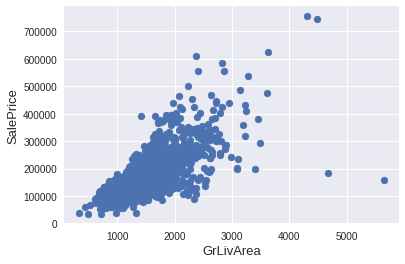

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

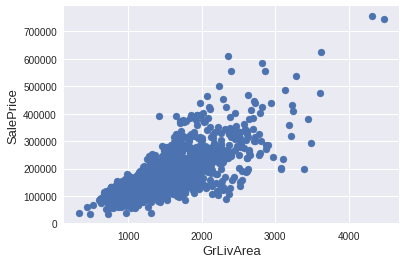

In [28]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Logarifm

In [29]:
df['SalePrice'] = np.log1p(df['SalePrice'])

/tmp/ipykernel_15330/874690988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice'] = np.log1p(df['SalePrice'])


In [30]:
num_cols2 = set(df._get_numeric_data().columns)

In [31]:
num_cols2

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBath',
 'TotalBsmtSF',
 'TotalSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold',
 'train'}

In [32]:
from scipy import stats
from scipy.stats import skew
skewed_feats = df[num_cols2].apply(lambda x: (abs(skew(x))) > 2).sort_values(ascending=False)
sks = pd.DataFrame({'Skew' :skewed_feats})
ln = sks[sks.values].index
#for col in ln:
#    df[col] = 
df[ln] = np.log1p(df[ln])

/home/mark/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
df[ln]

,LowQualFinSF,GarageYrBlt,OpenPorchSF,3SsnPorch,KitchenAbvGr,MasVnrArea,ScreenPorch,PoolArea,BsmtFinSF2,LotArea,MiscVal,EnclosedPorch
0,0.0,7.602900,4.127134,0.0,0.693147,5.283204,0.0,0.0,0.0,9.042040,0.000000,0.000000
1,0.0,7.589336,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,9.169623,0.000000,0.000000
2,0.0,7.601902,3.761200,0.0,0.693147,5.093750,0.0,0.0,0.0,9.328212,0.000000,0.000000
3,0.0,7.600402,3.583519,0.0,0.693147,0.000000,0.0,0.0,0.0,9.164401,0.000000,5.609472
4,0.0,7.601402,4.442651,0.0,0.693147,5.860786,0.0,0.0,0.0,9.565284,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.000000,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,7.568896,0.000000,0.000000
1455,0.0,7.586296,3.218876,0.0,0.693147,0.000000,0.0,0.0,0.0,7.546974,0.000000,0.000000
1456,0.0,7.581210,0.000000,0.0,0.693147,0.000000,0.0,0.0,0.0,9.903538,0.000000,0.000000
1457,0.0,0.000000,3.496508,0.0,0.693147,0.000000,0.0,0.0,0.0,9.253591,6.552508,0.000000


### Encoding

In [34]:
df[nominal_vars] = df[nominal_vars].astype(str)
df[ranking_vars] = df[ranking_vars].astype(str)

/home/mark/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [35]:
for c in ranking_vars:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

/tmp/ipykernel_15330/2751805664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = lbl.transform(list(df[c].values))


In [36]:
df = pd.get_dummies(df)
print(df.shape)

(2915, 211)


## Baseline Model

In [38]:
Y_train = pd.DataFrame(df[df['SalePrice'] > 0][['SalePrice']]).to_numpy().ravel()
Y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [43]:
X_train = df[df['train'] ==1]

In [45]:
X_train.drop(['SalePrice', 'train', 'Id'], axis=1, inplace=True)

/home/mark/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
X_test = df[df['train'] == 0].drop(['SalePrice', 'train', 'Id'], axis=1, inplace=True)

In [ ]:
ss_scaler = StandardScaler()
scaled_X = ss_scaler.fit_transform(X_train[num].drop(, axis = 1)) 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, random_state=42, train_size=0.7)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [ ]:
clf = RandomForestRegressor(
    n_estimators=100, n_jobs=-1, random_state=42)

#clf.fit(x_train, y_train)

# # evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = -cross_val_score(clf, X_train, Y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# # report performance
print('MSE: %.3f' % (np.mean(n_scores)))

#print("train mse:", mean_squared_error(clf.predict(x_train), y_train))
#print("test mse:", mean_squared_error(clf.predict(x_test), y_test))

In [ ]:
clf = GradientBoostingRegressor(n_estimators=300, max_depth=4, learning_rate=0.01)

clf.fit(x_train, y_train)

print("train mse:", mean_squared_error(clf.predict(x_train), y_train))
print("test mse:", mean_squared_error(clf.predict(x_test), y_test))

In [ ]:
clf = HuberRegressor()

clf.fit(x_train, y_train)

print("train mse:", mean_squared_error(clf.predict(x_train), y_train))
print("test mse:", mean_squared_error(clf.predict(x_test), y_test))

In [ ]:
clf = StackingRegressor(estimators=[('knn', KNeighborsRegressor(10)), 
                                    ('lr', LinearRegression())],
                        final_estimator=GradientBoostingRegressor(learning_rate=0.01))

clf.fit(x_train, y_train.ravel())

print("train mse:", mean_squared_error(clf.predict(x_train), y_train))
print("test mse:", mean_squared_error(clf.predict(x_test), y_test))

In [ ]:
estimators = [('tree', DecisionTreeRegressor(random_state=42)), ('knn', KNeighborsRegressor())]
stack_knn_tree = StackingRegressor(estimators=estimators)
stack_knn_tree.fit(x_train, y_train)
er_test_stack_knn_tree = mean_squared_error(stack_knn_tree.predict(x_test), y_test)
print("train mse:", mean_squared_error(stack_knn_tree.predict(x_train), y_train))
print("test mse:", er_test_stack_knn_tree)

In [ ]:
X_train

## Submit

In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test.index

In [ ]:
sub['SalePrice'] = stack_knn_tree.predict(X_test)


In [ ]:
sub.to_csv('submission.csv',index=False)

In [ ]:
sub

### Not mine

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as rfr, GradientBoostingRegressor as gbr
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

import optuna
from functools import partial

In [ ]:
n_folds = 5

def rmsle(model, x, y):
    return np.sqrt(mean_squared_error(y, model.predict(x)))

def rmsle_cv(model, x, y):
    #kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf = 5
    rmse =np.sqrt(-cross_val_score(model, x.values, y, scoring='neg_mean_squared_error', cv=kf))
    return rmse

In [ ]:
model_lasso = Pipeline([
    ('scaler', RobustScaler()),
    ('model', Lasso(alpha=0.0005))
])

model_enet = Pipeline([
    ('scaler', RobustScaler()),
    ('model', ElasticNet(alpha=0.0089, l1_ratio=0.009000000000000001, random_state=3))
])

model_krr = Pipeline([
    ('scaler', RobustScaler()),
    ('model', KernelRidge(alpha=0.6,
                        kernel='polynomial',
                        degree=2,
                        coef0=2.5))
])


In [ ]:
model_xgbr = XGBRegressor(colsample_bytree=0.4, learning_rate=0.00898718134841855, max_depth=8, 
                             n_estimators=2200, reg_alpha=0.036142628805195254, reg_lambda=0.03188665185506858,
                             subsample=0.6, random_state =42)

In [ ]:
model_gbr = gbr(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=5)



In [ ]:
model_lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
stack_gen = StackingCVRegressor(regressors=(model_lgbm, model_lasso, model_enet, model_krr, model_gbr),
                               meta_regressor=model_xgbr,
                               use_features_in_secondary=True)



In [ ]:
models = [
    model_lasso, model_enet, model_krr, model_gbr, model_xgbr, model_lgbm
]
cross_score = {
    'Lasso': 0,
    'ElasticNet': 0,
    'Kernel Ridge': 0,
    'GradientBoosting': 0,
    'XGBoost': 0,
    'LightGBM': 0,
}

In [ ]:
for idx, model in enumerate(models):
    cross_score[list(cross_score.keys())[idx]] = rmsle_cv(model, x_train, y_train).mean()

In [ ]:
for model in models:
    model = model.fit(x_train, y_train)

In [ ]:
cross_score

In [ ]:
stack_gen = stack_gen.fit(x_train, y_train)

In [ ]:
def blend(X):
    return ((0.15 * model_lasso.predict(X)) + \
            (0.15 * model_enet.predict(X)) + \
            (0.05 * model_krr.predict(X)) + \
            (0.15 * model_xgbr.predict(X)) + \
            (0.15 * model_lgbm.predict(X)) + \
            (0.35 * stack_gen.predict(np.array(X))))

In [ ]:
np.sqrt(mse(y_train, blend(x_train)))

In [ ]:
np.sqrt(mse(y_train, stack_gen.predict(x_train)))

In [ ]:
n_folds = 5

def rmsle(model, x, y):
    return np.sqrt(mean_squared_error(y, model.predict(x)))

def rmsle_cv(model, x, y):
    #kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf = 5
    rmse =np.sqrt(-cross_val_score(model, x.values, y, scoring='neg_mean_squared_error', cv=kf))
    return rmse.mean()

In [ ]:
result = rmsle_cv(RandomForestRegressor(
    n_estimators=100, n_jobs=-1, random_state=42), X_train, y_train.ravel())

In [ ]:
result**2